In [78]:
#https://rightcode.co.jp/blog/information-technology/pytorch-mnist-learning
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [79]:
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 1000)
        self.fc2 = torch.nn.Linear(1000, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        
        return f.log_softmax(x, dim=1)

In [80]:
def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    return {'train': train_loader, 'test': test_loader}

In [81]:
num_epoch = 20
history = {
    'train_loss':[],
    'test_loss':[],
    'test_acc':[]
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MyNet().to(device)
loaders = load_MNIST()


In [82]:
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

In [83]:
for i_epoch in range(num_epoch):
    loss = None
    
    net.train(True)
    
    for i, (data, target) in enumerate(loaders['train']):
        data = data.view(-1, 28*28)
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad()
        output = net(data)
        loss = f.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(i_epoch+1, (i+1)*128, loss.item()))
    
    history['train_loss'].append(loss)
    
    net.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data = data.view(-1, 28*28)
            data = data.to(device)
            target = target.to(device)
            
            output = net(data)
            test_loss += f.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= 10000
    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss, correct / 10000))
    
    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)
    
    

Training log: 1 epoch (128 / 60000 train. data). Loss: 2.3742623329162598
Training log: 1 epoch (1408 / 60000 train. data). Loss: 1.8330284357070923
Training log: 1 epoch (2688 / 60000 train. data). Loss: 1.4400423765182495
Training log: 1 epoch (3968 / 60000 train. data). Loss: 1.110687017440796
Training log: 1 epoch (5248 / 60000 train. data). Loss: 0.8526275157928467
Training log: 1 epoch (6528 / 60000 train. data). Loss: 0.7417600154876709
Training log: 1 epoch (7808 / 60000 train. data). Loss: 0.6191973686218262
Training log: 1 epoch (9088 / 60000 train. data). Loss: 0.6009341478347778
Training log: 1 epoch (10368 / 60000 train. data). Loss: 0.4397282898426056
Training log: 1 epoch (11648 / 60000 train. data). Loss: 0.48753660917282104
Training log: 1 epoch (12928 / 60000 train. data). Loss: 0.508772075176239
Training log: 1 epoch (14208 / 60000 train. data). Loss: 0.44476425647735596
Training log: 1 epoch (15488 / 60000 train. data). Loss: 0.44303882122039795
Training log: 1 epoc

Training log: 3 epoch (18048 / 60000 train. data). Loss: 0.25662538409233093
Training log: 3 epoch (19328 / 60000 train. data). Loss: 0.2523912787437439
Training log: 3 epoch (20608 / 60000 train. data). Loss: 0.12961171567440033
Training log: 3 epoch (21888 / 60000 train. data). Loss: 0.16393984854221344
Training log: 3 epoch (23168 / 60000 train. data). Loss: 0.13004344701766968
Training log: 3 epoch (24448 / 60000 train. data). Loss: 0.22103813290596008
Training log: 3 epoch (25728 / 60000 train. data). Loss: 0.2638709247112274
Training log: 3 epoch (27008 / 60000 train. data). Loss: 0.19675329327583313
Training log: 3 epoch (28288 / 60000 train. data). Loss: 0.3017708361148834
Training log: 3 epoch (29568 / 60000 train. data). Loss: 0.1567334532737732
Training log: 3 epoch (30848 / 60000 train. data). Loss: 0.2551848888397217
Training log: 3 epoch (32128 / 60000 train. data). Loss: 0.2962338328361511
Training log: 3 epoch (33408 / 60000 train. data). Loss: 0.22421838343143463
Train

Training log: 5 epoch (33408 / 60000 train. data). Loss: 0.26760607957839966
Training log: 5 epoch (34688 / 60000 train. data). Loss: 0.12701576948165894
Training log: 5 epoch (35968 / 60000 train. data). Loss: 0.09237856417894363
Training log: 5 epoch (37248 / 60000 train. data). Loss: 0.0912524163722992
Training log: 5 epoch (38528 / 60000 train. data). Loss: 0.15327171981334686
Training log: 5 epoch (39808 / 60000 train. data). Loss: 0.08282016217708588
Training log: 5 epoch (41088 / 60000 train. data). Loss: 0.057571981102228165
Training log: 5 epoch (42368 / 60000 train. data). Loss: 0.13315275311470032
Training log: 5 epoch (43648 / 60000 train. data). Loss: 0.13219527900218964
Training log: 5 epoch (44928 / 60000 train. data). Loss: 0.10404163599014282
Training log: 5 epoch (46208 / 60000 train. data). Loss: 0.10168436169624329
Training log: 5 epoch (47488 / 60000 train. data). Loss: 0.05063081160187721
Training log: 5 epoch (48768 / 60000 train. data). Loss: 0.1351269781589508


Training log: 7 epoch (48768 / 60000 train. data). Loss: 0.07196397334337234
Training log: 7 epoch (50048 / 60000 train. data). Loss: 0.031773217022418976
Training log: 7 epoch (51328 / 60000 train. data). Loss: 0.03906729444861412
Training log: 7 epoch (52608 / 60000 train. data). Loss: 0.03045079857110977
Training log: 7 epoch (53888 / 60000 train. data). Loss: 0.08923190832138062
Training log: 7 epoch (55168 / 60000 train. data). Loss: 0.07156632095575333
Training log: 7 epoch (56448 / 60000 train. data). Loss: 0.03833051770925522
Training log: 7 epoch (57728 / 60000 train. data). Loss: 0.05567598715424538
Training log: 7 epoch (59008 / 60000 train. data). Loss: 0.048354487866163254
Test loss (avg): 0.08853961670398712, Accuracy: 0.974
Training log: 8 epoch (128 / 60000 train. data). Loss: 0.032253243029117584
Training log: 8 epoch (1408 / 60000 train. data). Loss: 0.07439969480037689
Training log: 8 epoch (2688 / 60000 train. data). Loss: 0.09719149768352509
Training log: 8 epoch (

Training log: 10 epoch (2688 / 60000 train. data). Loss: 0.05782614275813103
Training log: 10 epoch (3968 / 60000 train. data). Loss: 0.01547076553106308
Training log: 10 epoch (5248 / 60000 train. data). Loss: 0.01763887330889702
Training log: 10 epoch (6528 / 60000 train. data). Loss: 0.06048644334077835
Training log: 10 epoch (7808 / 60000 train. data). Loss: 0.02987394668161869
Training log: 10 epoch (9088 / 60000 train. data). Loss: 0.032492198050022125
Training log: 10 epoch (10368 / 60000 train. data). Loss: 0.155377596616745
Training log: 10 epoch (11648 / 60000 train. data). Loss: 0.04216752201318741
Training log: 10 epoch (12928 / 60000 train. data). Loss: 0.0850716382265091
Training log: 10 epoch (14208 / 60000 train. data). Loss: 0.01918836683034897
Training log: 10 epoch (15488 / 60000 train. data). Loss: 0.024115698412060738
Training log: 10 epoch (16768 / 60000 train. data). Loss: 0.0077512748539447784
Training log: 10 epoch (18048 / 60000 train. data). Loss: 0.030929546

Training log: 12 epoch (15488 / 60000 train. data). Loss: 0.031724993139505386
Training log: 12 epoch (16768 / 60000 train. data). Loss: 0.01511036790907383
Training log: 12 epoch (18048 / 60000 train. data). Loss: 0.02396358922123909
Training log: 12 epoch (19328 / 60000 train. data). Loss: 0.016912104561924934
Training log: 12 epoch (20608 / 60000 train. data). Loss: 0.027938932180404663
Training log: 12 epoch (21888 / 60000 train. data). Loss: 0.006200578063726425
Training log: 12 epoch (23168 / 60000 train. data). Loss: 0.01081027276813984
Training log: 12 epoch (24448 / 60000 train. data). Loss: 0.006410099565982819
Training log: 12 epoch (25728 / 60000 train. data). Loss: 0.0675923228263855
Training log: 12 epoch (27008 / 60000 train. data). Loss: 0.029404420405626297
Training log: 12 epoch (28288 / 60000 train. data). Loss: 0.04663942754268646
Training log: 12 epoch (29568 / 60000 train. data). Loss: 0.08363132178783417
Training log: 12 epoch (30848 / 60000 train. data). Loss: 0

Training log: 14 epoch (28288 / 60000 train. data). Loss: 0.00708794966340065
Training log: 14 epoch (29568 / 60000 train. data). Loss: 0.007176162675023079
Training log: 14 epoch (30848 / 60000 train. data). Loss: 0.025706909596920013
Training log: 14 epoch (32128 / 60000 train. data). Loss: 0.017962682992219925
Training log: 14 epoch (33408 / 60000 train. data). Loss: 0.016125187277793884
Training log: 14 epoch (34688 / 60000 train. data). Loss: 0.018385285511612892
Training log: 14 epoch (35968 / 60000 train. data). Loss: 0.008936632424592972
Training log: 14 epoch (37248 / 60000 train. data). Loss: 0.04235277697443962
Training log: 14 epoch (38528 / 60000 train. data). Loss: 0.01141069084405899
Training log: 14 epoch (39808 / 60000 train. data). Loss: 0.01474378164857626
Training log: 14 epoch (41088 / 60000 train. data). Loss: 0.02502991072833538
Training log: 14 epoch (42368 / 60000 train. data). Loss: 0.007966428995132446
Training log: 14 epoch (43648 / 60000 train. data). Loss:

Training log: 16 epoch (41088 / 60000 train. data). Loss: 0.003306800499558449
Training log: 16 epoch (42368 / 60000 train. data). Loss: 0.019229354336857796
Training log: 16 epoch (43648 / 60000 train. data). Loss: 0.010998949408531189
Training log: 16 epoch (44928 / 60000 train. data). Loss: 0.0035711564123630524
Training log: 16 epoch (46208 / 60000 train. data). Loss: 0.02222268097102642
Training log: 16 epoch (47488 / 60000 train. data). Loss: 0.0029833298176527023
Training log: 16 epoch (48768 / 60000 train. data). Loss: 0.00518084317445755
Training log: 16 epoch (50048 / 60000 train. data). Loss: 0.011039737612009048
Training log: 16 epoch (51328 / 60000 train. data). Loss: 0.003871031105518341
Training log: 16 epoch (52608 / 60000 train. data). Loss: 0.023653695359826088
Training log: 16 epoch (53888 / 60000 train. data). Loss: 0.008417051285505295
Training log: 16 epoch (55168 / 60000 train. data). Loss: 0.06301162391901016
Training log: 16 epoch (56448 / 60000 train. data). L

Training log: 18 epoch (53888 / 60000 train. data). Loss: 0.004988580942153931
Training log: 18 epoch (55168 / 60000 train. data). Loss: 0.004127036780118942
Training log: 18 epoch (56448 / 60000 train. data). Loss: 0.003063960000872612
Training log: 18 epoch (57728 / 60000 train. data). Loss: 0.0033054370433092117
Training log: 18 epoch (59008 / 60000 train. data). Loss: 0.008224725723266602
Test loss (avg): 0.06391300194263458, Accuracy: 0.9818
Training log: 19 epoch (128 / 60000 train. data). Loss: 0.0014110468327999115
Training log: 19 epoch (1408 / 60000 train. data). Loss: 0.020414691418409348
Training log: 19 epoch (2688 / 60000 train. data). Loss: 0.003924533724784851
Training log: 19 epoch (3968 / 60000 train. data). Loss: 0.004197664558887482
Training log: 19 epoch (5248 / 60000 train. data). Loss: 0.0025051236152648926
Training log: 19 epoch (6528 / 60000 train. data). Loss: 0.004896709695458412
Training log: 19 epoch (7808 / 60000 train. data). Loss: 0.0032860711216926575
T

{'train_loss': [tensor(0.4600, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.2553, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0926, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.1647, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0896, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0633, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0126, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0306, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0205, device='c

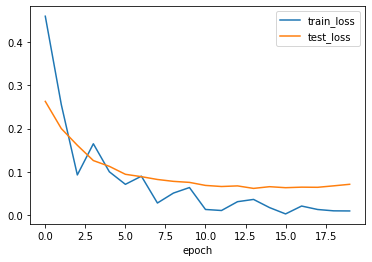

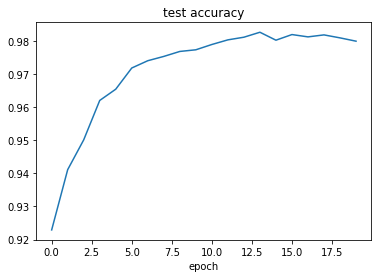

In [84]:
num_epoch
print(history)
plt.figure()
plt.plot(range(len(history['train_loss'])), history['train_loss'], label='train_loss')
plt.plot(range(len(history['test_loss'])), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss.png')

plt.figure()
plt.plot(range(len(history['test_acc'])), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc.png')